<a href="https://colab.research.google.com/github/Leonardo-Dias-Up/GeoPandas/blob/main/IES_MG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalando as bibliotecas
!pip install geopandas
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importando as bibliotecas
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
import shapely.wkt
import shapely.geometry
from haversine import haversine, Unit, haversine_vector
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

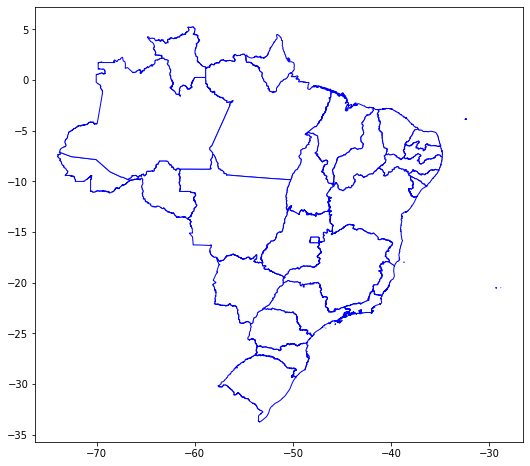

In [4]:
# GeoDataFrame - Brasil Regioes - fonte de dados em www.ibge.gov.br/geociencias/downloads-geociencias.html
BrasilRegioes = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/IBGE - Brasil Regiões/BR_UF_2021.shx',encoding="utf-8")
BrasilRegioes.plot(figsize=(16,8), facecolor='white', edgecolor='blue')

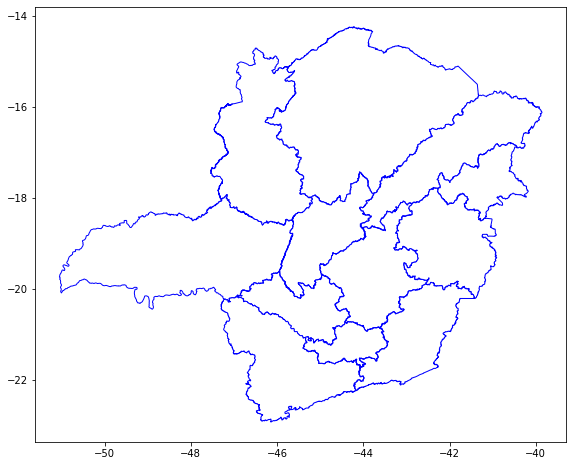

In [5]:
# GeoDataFrame - Mesoregiões MG - fonte de dados em www.ibge.gov.br/geociencias/downloads-geociencias.html
MesoRegioes_MG = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/IBGE - Mesoregiões MG/MG_Mesorregioes_2021.shx',encoding="utf-8")
MesoRegioes_MG.plot(figsize=(16,8), facecolor='white', edgecolor='blue')

In [6]:
# GeoDataFrame - Municipios MG
Municipios_MG = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/IBGE - Municipios MG/MG_Municipios_2021.shp', encoding='utf-8')
Municipios_MG.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3100104,Abadia dos Dourados,MG,880.461,"POLYGON ((-47.43543 -18.16778, -47.43401 -18.1..."
1,3100203,Abaeté,MG,1817.067,"POLYGON ((-45.16777 -18.89073, -45.16719 -18.8..."
2,3100302,Abre Campo,MG,470.551,"POLYGON ((-42.38219 -20.12176, -42.38205 -20.1..."
3,3100401,Acaiaca,MG,101.886,"POLYGON ((-43.13156 -20.34249, -43.13143 -20.3..."
4,3100500,Açucena,MG,815.422,"POLYGON ((-42.37085 -18.92507, -42.37036 -18.9..."


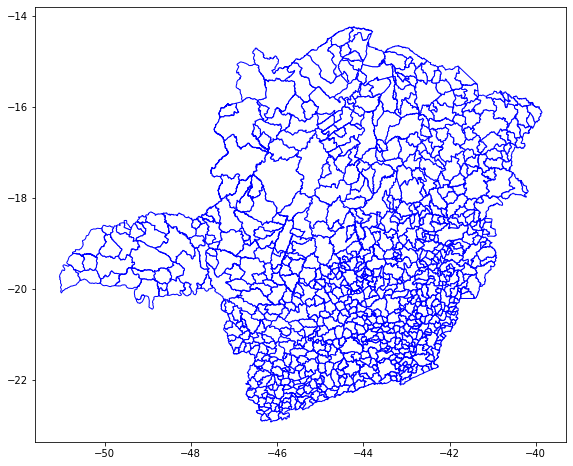

In [7]:
# Melhorando a visualização do plt
Municipios_MG.plot(figsize=(16,8), facecolor='white', edgecolor='blue')
plt.show()

In [8]:
# Filtrando apenas Mariana
gpd_Mariana = Municipios_MG[Municipios_MG['NM_MUN'] == 'Mariana']
type(gpd_Mariana['geometry'])

geopandas.geoseries.GeoSeries

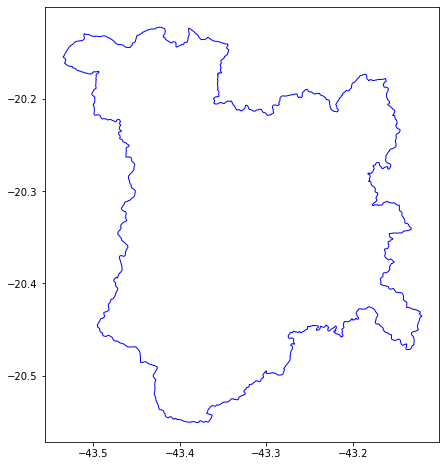

In [9]:
# Plot Mariana
gpd_Mariana.plot(figsize=(16,8), facecolor='white', edgecolor='blue')

In [10]:
# GeoDataFrame - Minas Gerais - fonte de dados em GOOGLE MAPS
IES = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/IES - MG.xlsx")
IES = IES.dropna()
IES.head()

,Instituição,Nível,Latitude,Longitude
0,Universidade Estadual de Montes Claros,Estadual,-16.719079,-43.881190
1,Universidade Estadual de Almenara,Estadual,-16.177359,-40.700046
2,Universidade Estadual de Bocaiuva,Estadual,-17.115892,-43.819355
3,Universidade Estadual de Brasília de Minas,Estadual,-16.212449,-44.435490
4,Universidade Estadual de Espinosa,Estadual,-14.927494,-42.821925


In [11]:
# Outra Forma
IES = gpd.GeoDataFrame(
    IES, geometry=gpd.points_from_xy(IES["Longitude"],IES["Latitude"])
)
IES.head()

,Instituição,Nível,Latitude,Longitude,geometry
0,Universidade Estadual de Montes Claros,Estadual,-16.719079,-43.881190,POINT (-43.88119 -16.71908)
1,Universidade Estadual de Almenara,Estadual,-16.177359,-40.700046,POINT (-40.70005 -16.17736)
2,Universidade Estadual de Bocaiuva,Estadual,-17.115892,-43.819355,POINT (-43.81936 -17.11589)
3,Universidade Estadual de Brasília de Minas,Estadual,-16.212449,-44.435490,POINT (-44.43549 -16.21245)
4,Universidade Estadual de Espinosa,Estadual,-14.927494,-42.821925,POINT (-42.82193 -14.92749)


In [12]:
# Classificação
Estadual = IES[IES.Nível == 'Estadual ']
Federal = IES[IES.Nível == 'Federal']
Tecnico = IES[IES.Nível == 'CEFET']
IEF = IES[IES.Nível == 'IEF']

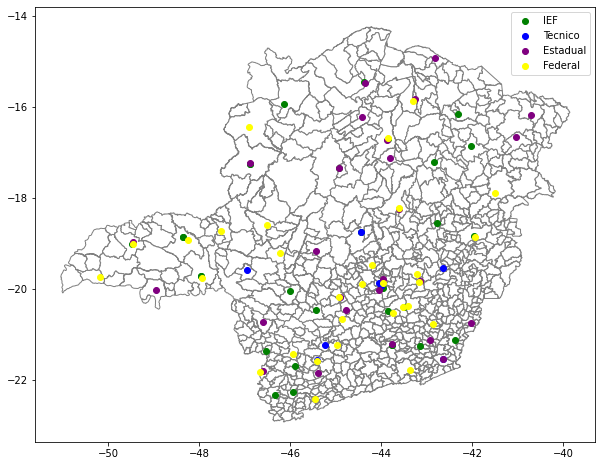

In [13]:
# Plotado a nuvem de recursos naturais em Municipios MG juntamente com a cidade de Belo Horizonte
fig, ax = plt.subplots(figsize=(16,8))

Municipios_MG.plot(ax=ax, facecolor='white', edgecolor='gray')
IEF.plot(ax=ax, color='green') 
Tecnico.plot(ax=ax, color='blue')
Estadual.plot(ax=ax, color='purple')
Federal.plot(ax=ax, color='yellow')
ax.legend(['IEF', 'Tecnico', 'Estadual', 'Federal'])